# Exploratory Data Analysis 

In [ ]:
#!pip install pandas_profiling
#profile = ProfileReport(client_df, title="Pandas Profiling Report")
#profile

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [52]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

You can see that all of the `datetime` related columns are not currently in datetime format. We will need to convert these later.

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
pd.DataFrame({"Missing values (%)":round(client_df.isnull().sum()/len(client_df), 2)})

,Missing values (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


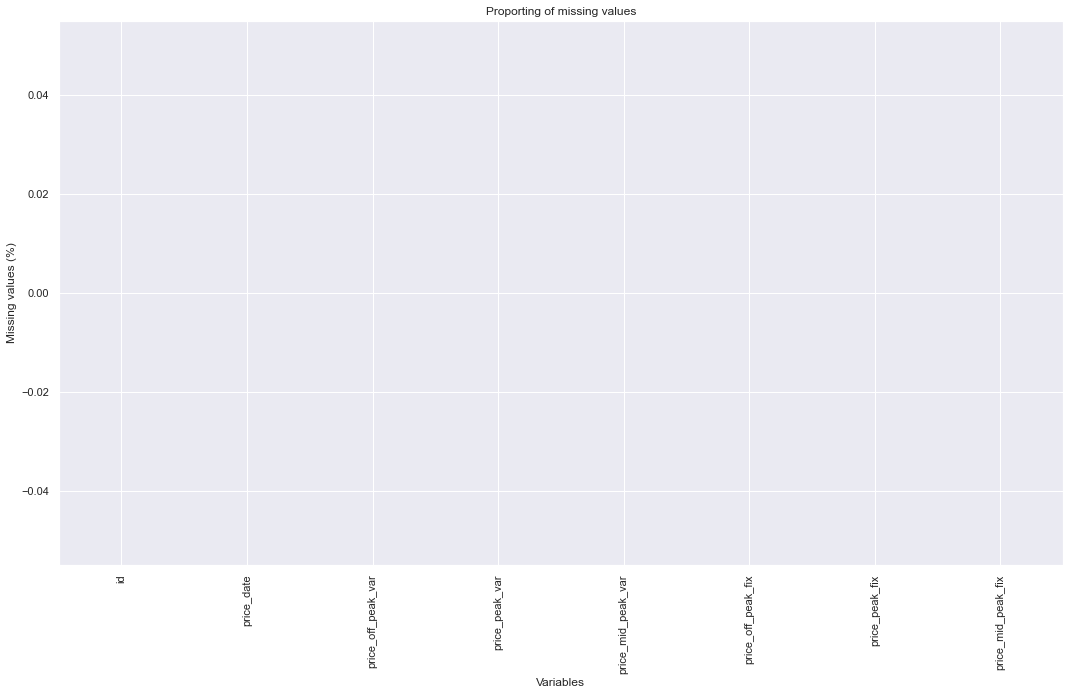

In [10]:
(price_df.isnull().sum()/len(price_df.index)*100).plot(kind="bar", figsize=(18,10)) # Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.title("Proporting of missing values")
plt.show()

In [53]:
data = client_df.merge(price_df, how = 'left', on = 'id')
data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


**Checking the duplicates**

In [12]:
data[data.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


**Datatype correction**

In [13]:
data[['channel_sales','has_gas', 'origin_up']].nunique()

channel_sales    8
has_gas          2
origin_up        6
dtype: int64

In [54]:
#____________ Convert to Categories _____________

data[['channel_sales','has_gas', 'origin_up']] = data[['channel_sales','has_gas', 'origin_up']].astype('category')

In [ ]:
#____________ Convert date to Datetime________
#import datetime as dt
#data[['date_activ','date_end','date_modif_prod','date_renewal', 'price_date']] = pd.to_datetime(data[['date_activ','date_end','date_modif_prod','date_renewal', 'price_date']])

**Outlier Removal**


Remove the bottom 10% of observations. This outlier removal method will remove negative prices and forecasted prices

In [21]:
original_data = data.copy()
churn_data = data[['id','churn']].copy()
#data = data.drop('churn', axis=1)

In [22]:
int_cols = data.select_dtypes(include=[np.int64])
int_cols = list(int_cols.columns)

float_cols = data.select_dtypes(include=[np.float64])
float_cols = list(float_cols.columns)

categ_cols = data.select_dtypes(include=['category'])
categ_cols = list(categ_cols.columns)

In [23]:
from scipy import stats

data = pd.DataFrame(stats.trim1(data, 0.1, tail='left'), columns=data.columns)

In [24]:
data[int_cols] = data[int_cols].astype(np.int64)
data[float_cols] = data[float_cols].astype(np.float64)
data[categ_cols] = data[categ_cols].astype('category')

In [25]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157635 entries, 0 to 157634
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              157635 non-null  object  
 1   channel_sales                   157635 non-null  category
 2   cons_12m                        157635 non-null  int64   
 3   cons_gas_12m                    157635 non-null  int64   
 4   cons_last_month                 157635 non-null  int64   
 5   date_activ                      157635 non-null  object  
 6   date_end                        157635 non-null  object  
 7   date_modif_prod                 157635 non-null  object  
 8   date_renewal                    157635 non-null  object  
 9   forecast_cons_12m               157635 non-null  float64 
 10  forecast_cons_year              157635 non-null  int64   
 11  forecast_discount_energy        157635 non-null  float64 
 12  fo

(           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
 count  1.576350e+05  1.576350e+05    157635.000000      157635.000000   
 mean   1.768070e+05  3.120062e+04     17883.807232        2065.603576   
 std    6.020123e+05  1.714698e+05     67622.813473        2438.018297   
 min    2.524000e+03  0.000000e+00         0.000000         230.870000   
 25%    7.560000e+03  0.000000e+00         0.000000         645.110000   
 50%    1.704000e+04  0.000000e+00      1102.000000        1285.680000   
 75%    4.704700e+04  0.000000e+00      3967.000000        2631.590000   
 max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   
 
        forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
 count       157635.000000             157635.000000            157635.000000   
 mean          1555.304875                  1.074470                69.708475   
 std           3388.527170                  5.374642                66.477021   
 min    

---

## Data Visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

### **3.1 Co-relation**

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


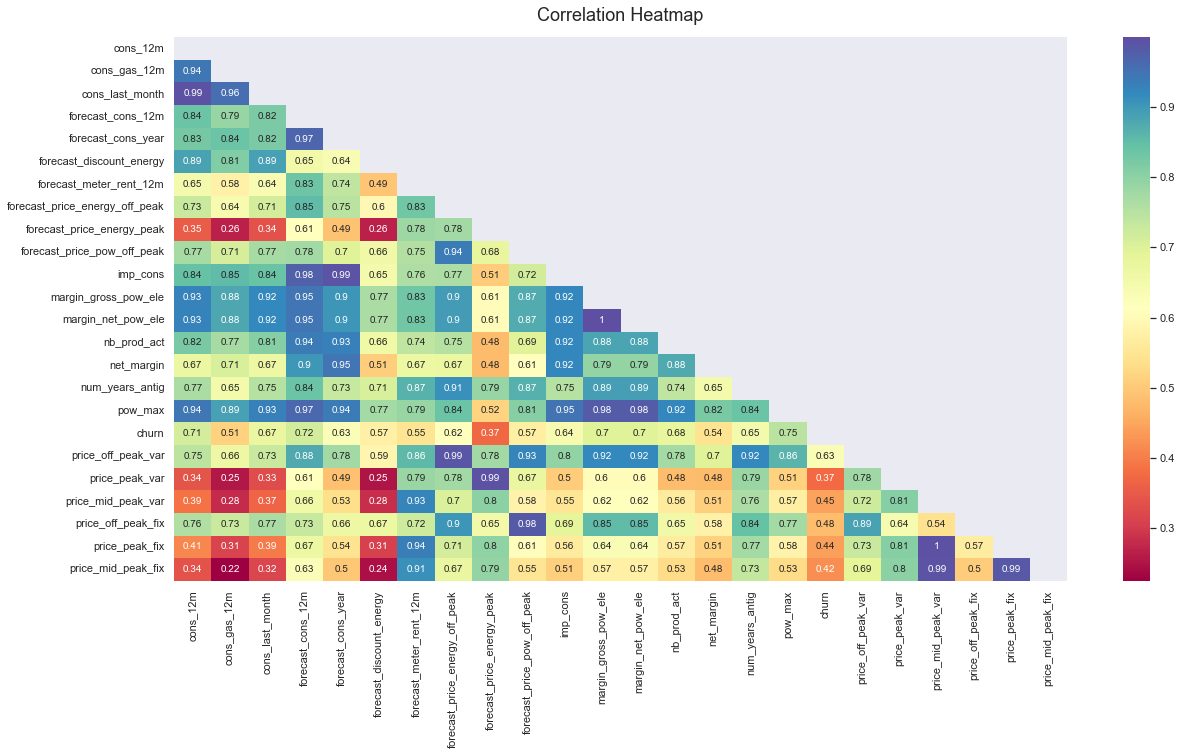

In [26]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot = True, cmap='Spectral')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [27]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

### 3.2) Churn 

The dataset was imbalanced and only 10% customers churned

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

Text(0.5, 1.0, 'Churning Status')

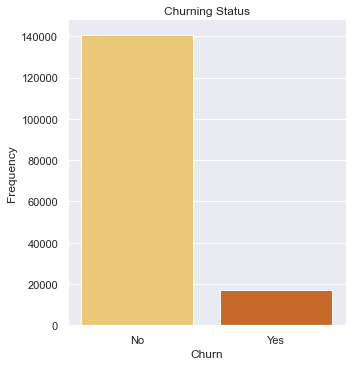

In [28]:
sns.catplot(x="churn", kind="count", palette="YlOrBr", data=data)
plt.ylabel('Frequency')
plt.xlabel('Churn')
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Churning Status')

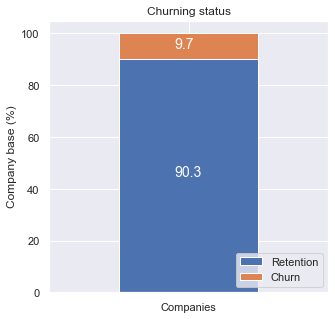

In [29]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### 3.3) SME Activity

We have different sales channels, 7 in no.; but customer churn happened mainly in 2 channels, which needs to be analyzed.

In [30]:
pd.DataFrame({'Frequency':data['channel_sales'].value_counts()})

,Frequency
foosdfpfkusacimwkcsosbicdxkicaua,80971
MISSING,27170
lmkebamcaaclubfxadlmueccxoimlema,22105
usilxuppasemubllopkaafesmlibmsdf,16486
ewpakwlliwisiwduibdlfmalxowmwpci,10712
sddiedcslfslkckwlfkdpoeeailfpeds,131
epumfxlbckeskwekxbiuasklxalciiuu,36
fixdbufsefwooaasfcxdxadsiekoceaa,24


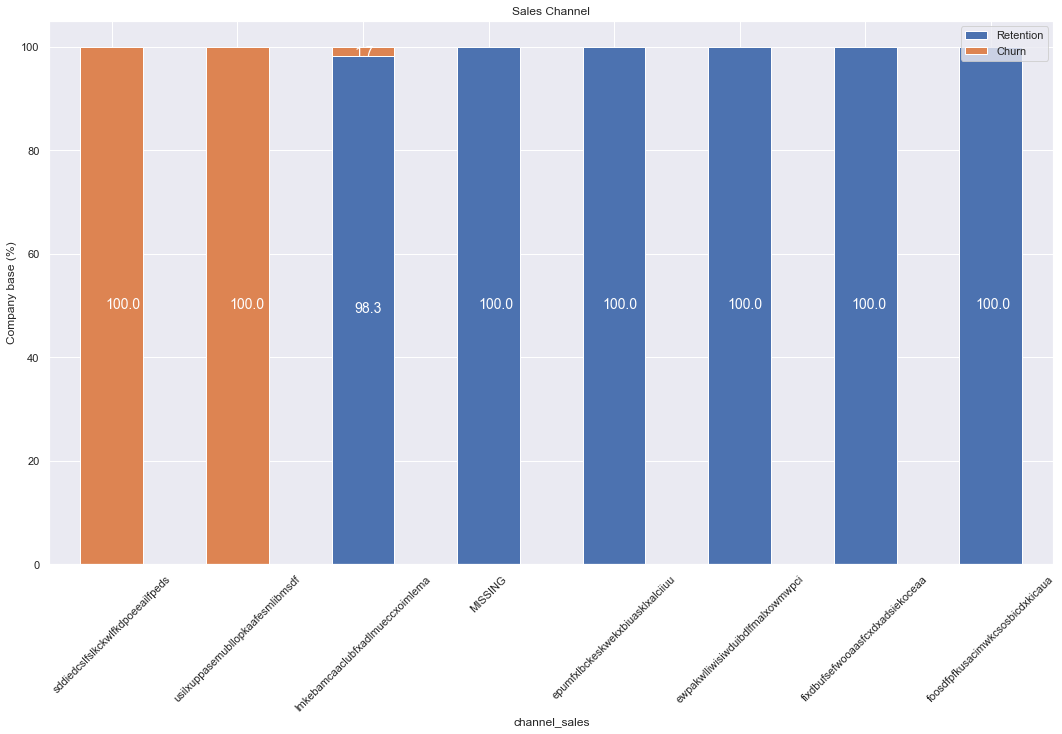

In [31]:
channel = data[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel["channel_sales"], channel["churn"]])["id"].count().unstack(level=1)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=45)

### 3.4) Consumption

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

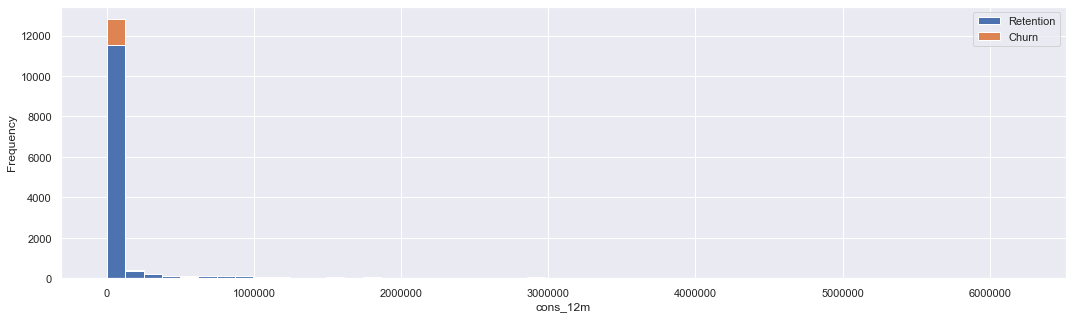

In [32]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

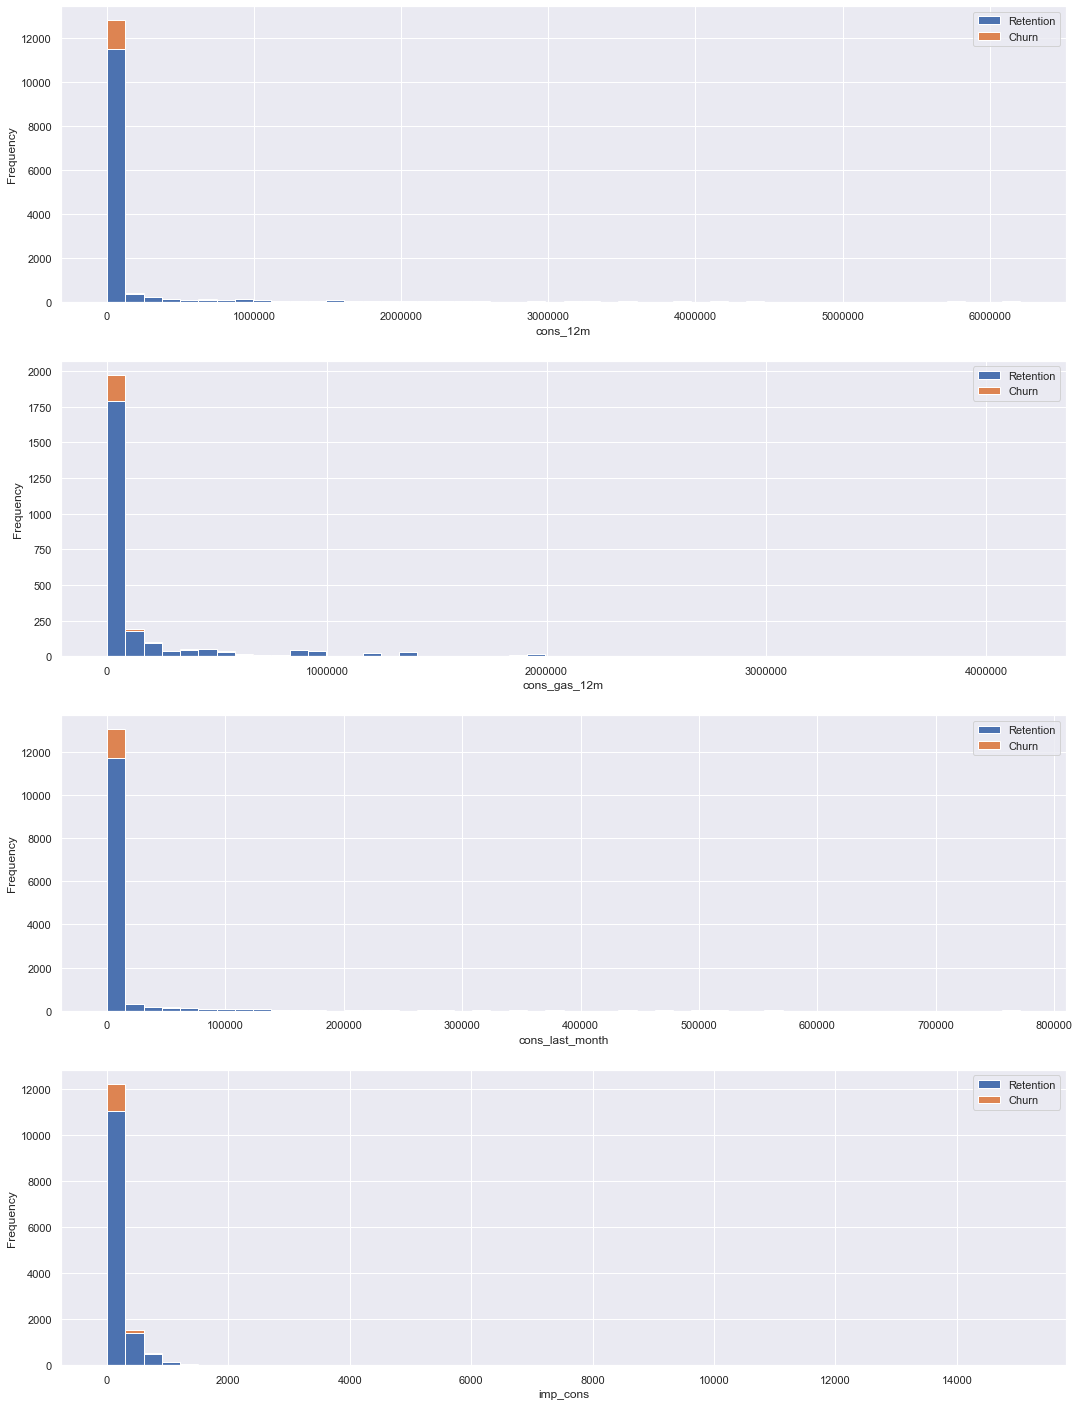

In [34]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"],"cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

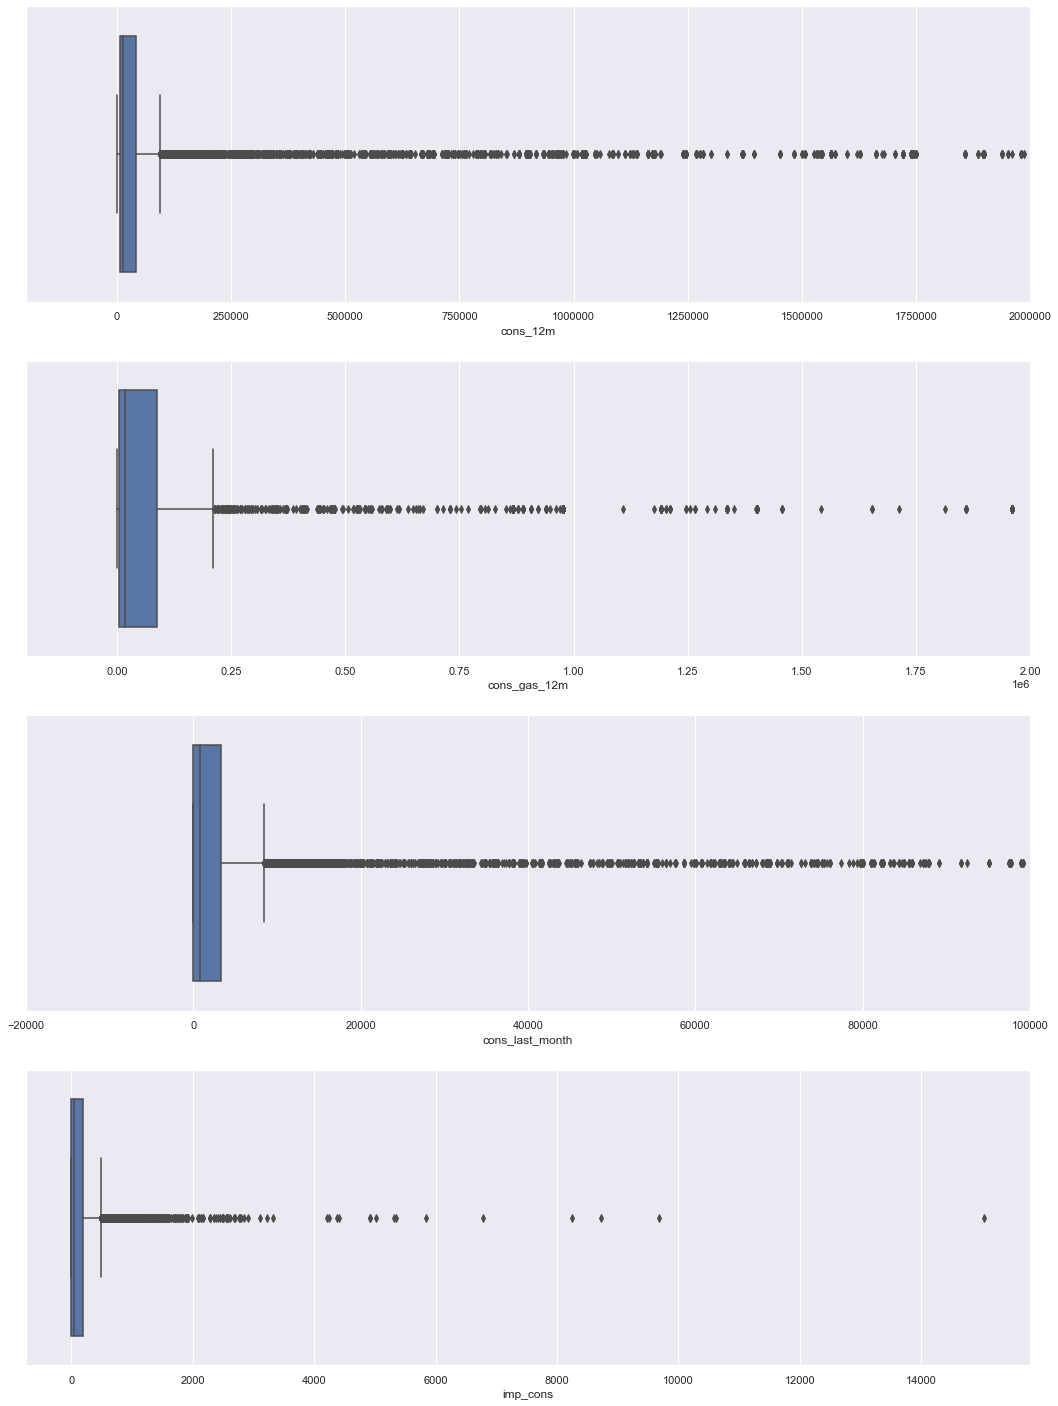

In [35]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])


# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

Text(0.5, 1.0, 'Churn status of clients based on if they are also gas clients')

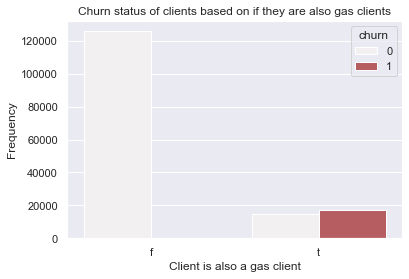

In [36]:
sns.countplot(x="has_gas",hue='churn', data=data, color="r")
plt.xlabel('Client is also a gas client')
plt.ylabel('Frequency')
plt.title('Churn status of clients based on if they are also gas clients')

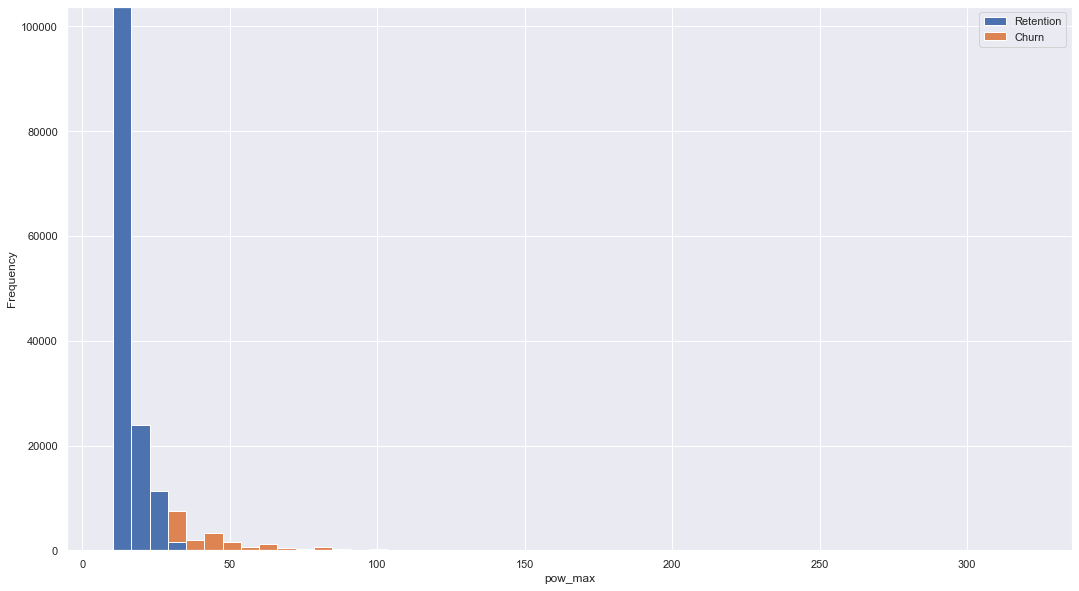

In [37]:
power = data[["id","pow_max", "churn"]]
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

In [38]:
others = data[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

### 3.5. Electricity campaign the customer first subscribed to

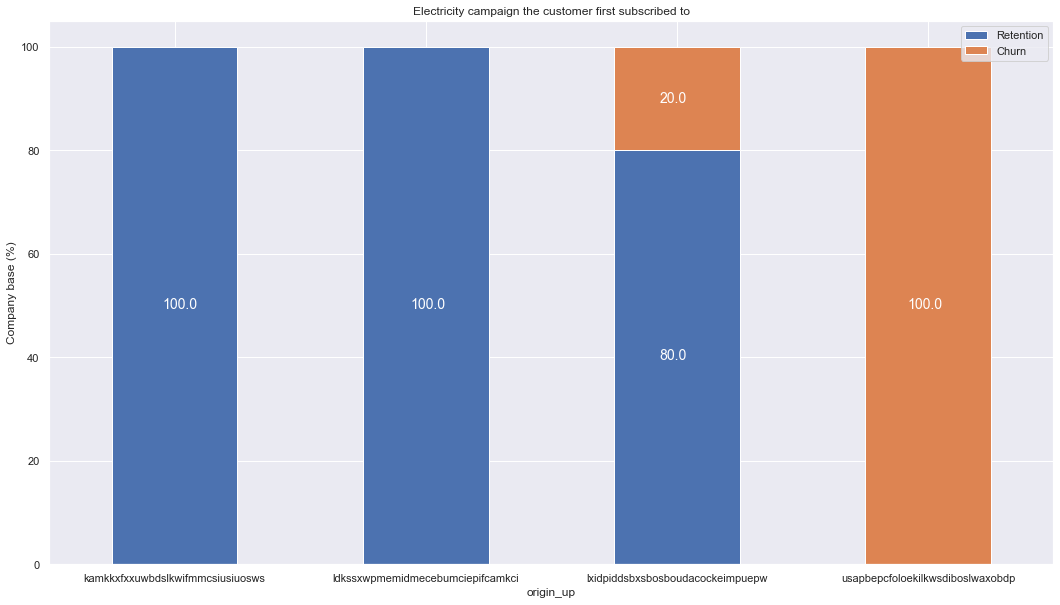

In [39]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Electricity campaign the customer first subscribed to")

### 3.6) Forecast

In [62]:
#list(data.columns)

In [40]:
data.rename(columns = {'forecast_price_energy_off_peak': 'forecast_price_energy_p1', 'forecast_price_energy_peak':'forecast_price_energy_p2', 'forecast_price_pow_off_peak':'forecast_price_pow_p1'}, inplace = True)

In [41]:
forecast = data[['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'id', 'churn']]

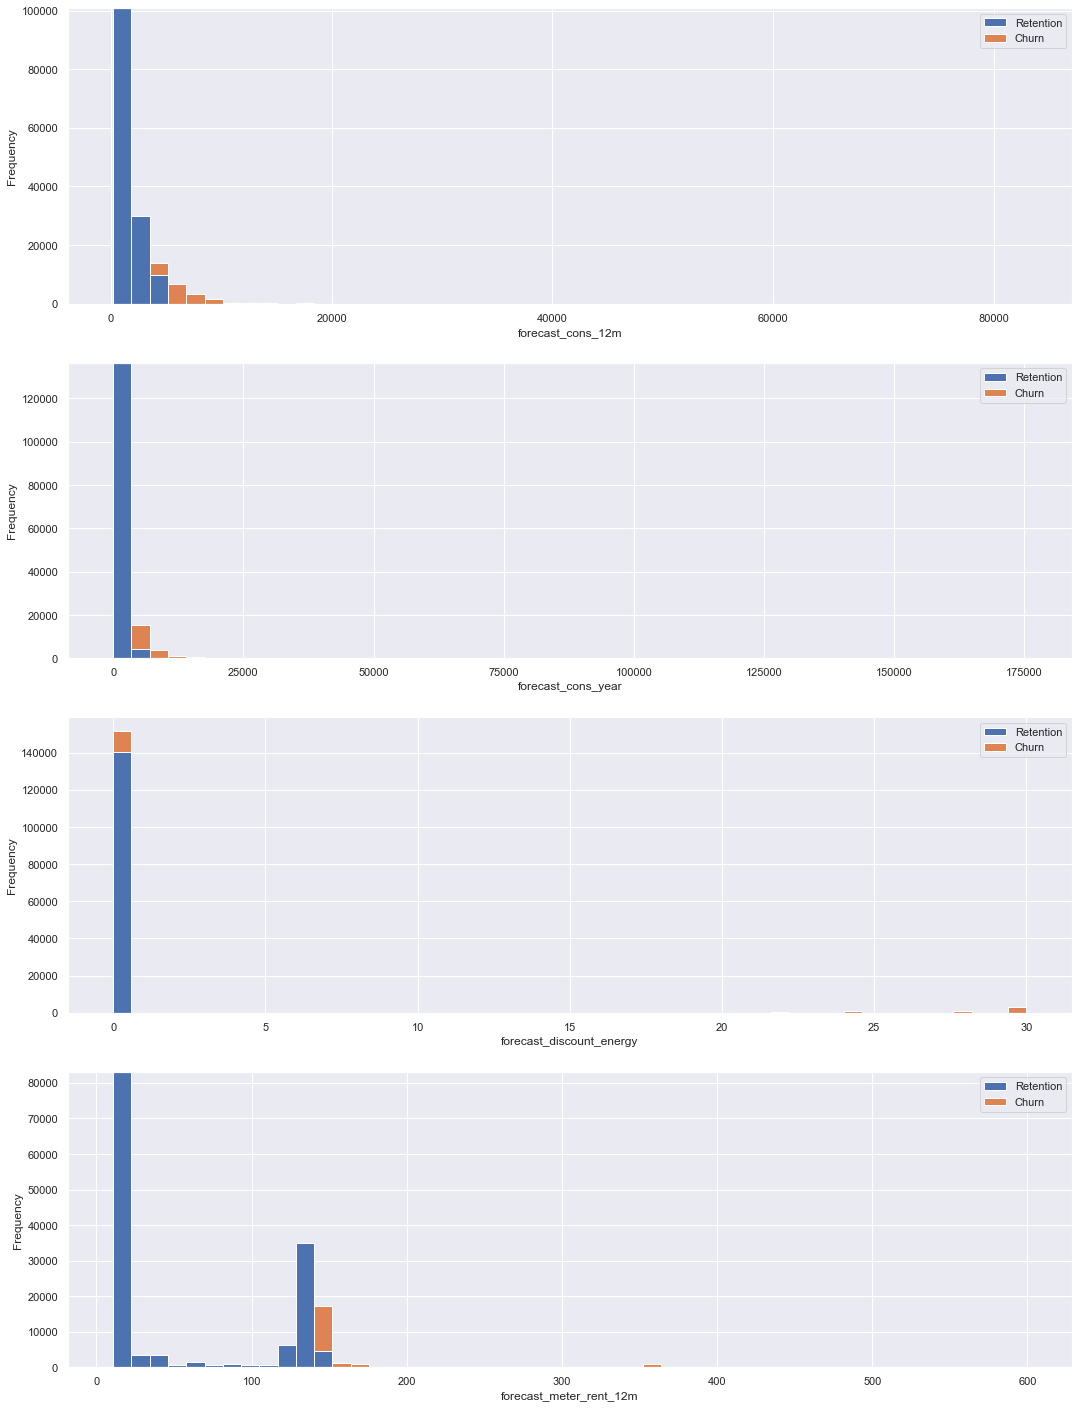

In [43]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(forecast, "forecast_cons_12m", axs[0])
plot_distribution(forecast, "forecast_cons_year", axs[1])
plot_distribution(forecast, "forecast_discount_energy", axs[2])
plot_distribution(forecast, "forecast_meter_rent_12m", axs[3])

### 3.7) Relationships between price of energy and customer churn for the three periods

For the first period, there is a statistically significant difference in the price of energy for churned and retained customers.

In [44]:
data.rename(columns = {'price_off_peak_var': 'price_p1_var', 'price_peak_var':'price_p2_var', 'price_mid_peak_var':'price_p3_var', 'price_off_peak_fix':'price_p1_fix','price_peak_fix': 'price_p2_fix', 'price_mid_peak_fix':'price_p3_fix'}, inplace = True)

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 1st period')

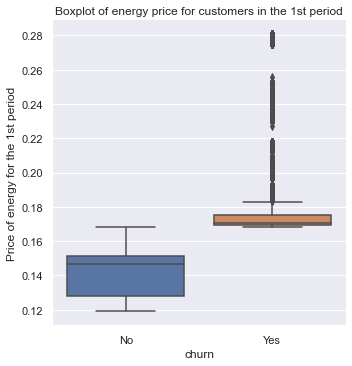

In [45]:
sns.catplot(x="churn", y="price_p1_var", kind="box", data=data)
plt.ylabel('Price of energy for the 1st period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 1st period')

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 2nd period')

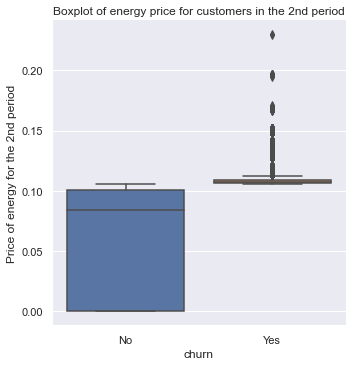

In [46]:
sns.catplot(x="churn", y="price_p2_var", kind="box", data=data)
plt.ylabel('Price of energy for the 2nd period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 2nd period')

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 3rd period')

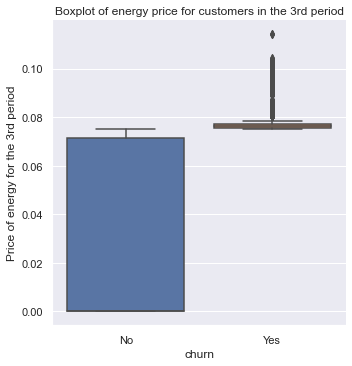

In [47]:
sns.catplot(x="churn", y="price_p3_var", kind="box", data=data)
plt.ylabel('Price of energy for the 3rd period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 3rd period')

**Price of the power in the first period and the Customer Churn**

Text(0.5, 1.0, 'Boxplot of power price for customers in the 1st period')

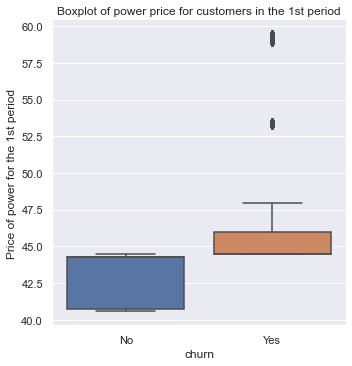

In [49]:
sns.catplot(x="churn", y="price_p1_fix", kind="box", data=data)
plt.ylabel('Price of power for the 1st period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of power price for customers in the 1st period')

In [55]:
data.to_csv('C:/Users/Karthika/Documents/Data Analytics Course/Module 2/processed_data_w_outliers.csv', index=False)